#Youtube_Adview Prediction Project

> Using "train.csv"



> **-By VARUN VERMA**

> User_id = *varun.verma*

### Importing Libraries and loading the dataset

In [69]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

In [70]:
#loading the data
df = pd.read_csv('train.csv');
df.head()

vidid  adview    views likes  ... comment   published duration category
0  VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        F
1  VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        D
2   VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        C
3  VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        H
4  VID_10175       1      666     1  ...       0  2016-06-29    PT31S        D

[5 rows x 9 columns]

In [71]:
df.shape

(14999, 9)

### Preprocessing the data

In [72]:
#mapping category feature to numbers
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

#transforming category
df['category'] = df['category'].map(category)
df.head()

vidid  adview    views likes  ... comment   published duration category
0  VID_18655      40  1031602  8523  ...    1095  2016-09-14  PT7M37S        6
1  VID_14135       2     1707    56  ...       6  2016-10-01  PT9M30S        4
2   VID_2187       1     2023    25  ...       2  2016-07-02  PT2M16S        3
3  VID_23096       6   620860   777  ...     153  2016-07-27  PT4M22S        8
4  VID_10175       1      666     1  ...       0  2016-06-29    PT31S        4

[5 rows x 9 columns]

In [73]:
# removing F from likes, dislikes, views, comments and adviews
df = df[df.views != 'F']
df = df[df.comment != 'F']
df = df[df.dislikes != 'F']
df = df[df.likes != 'F']

In [74]:
#rows with F in views, likes, dislikes and comment is removed
df.shape

(14637, 9)

In [75]:
df.dtypes
# as we can see likes, views etc has object dtypes. So, need to covert to numeric

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [76]:
df['views'] = pd.to_numeric(df['views'])
df['comment'] = pd.to_numeric(df['comment'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])
df['adview'] = pd.to_numeric(df['adview'])

In [77]:
# storing vidid column in another variable for further use
col_vidid = df['vidid']

In [78]:
# performing encoding on vivid, duration and published
from sklearn.preprocessing import LabelEncoder
df['published'] = LabelEncoder().fit_transform(df['published'])
df['vidid'] = LabelEncoder().fit_transform(df['vidid'])
df['duration'] = LabelEncoder().fit_transform(df['duration'])
df.head()

vidid  adview    views  likes  ...  comment  published  duration  category
0   5912      40  1031602   8523  ...     1095       2168      2925         6
1   2741       2     1707     56  ...        6       2185      3040         4
2   8138       1     2023     25  ...        2       2094      1863         3
3   9005       6   620860    777  ...      153       2119      2546         8
4    122       1      666      1  ...        0       2091      1963         4

[5 rows x 9 columns]

In [79]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

df["duration"]=time1
df.head()

vidid  adview    views  likes  ...  comment  published  duration  category
0   5912      40  1031602   8523  ...     1095       2168       457         6
1   2741       2     1707     56  ...        6       2185       570         4
2   8138       1     2023     25  ...        2       2094       136         3
3   9005       6   620860    777  ...      153       2119       262         8
4    122       1      666      1  ...        0       2091        31         4

[5 rows x 9 columns]

### Visualization

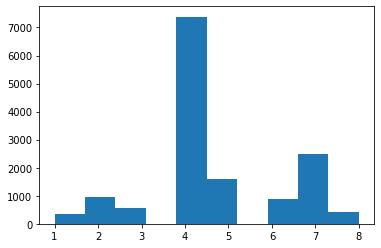

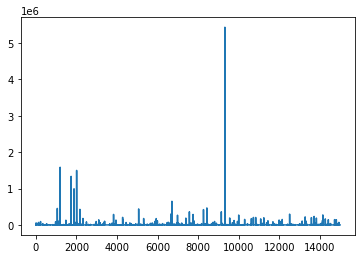

In [80]:
# Visualization
# Individual Plots
plt.hist(df["category"])
plt.show()
plt.plot(df["adview"])
plt.show()
# Remove videos with adview greater than 2000000 as outlier
df = df[df["adview"] <2000000]

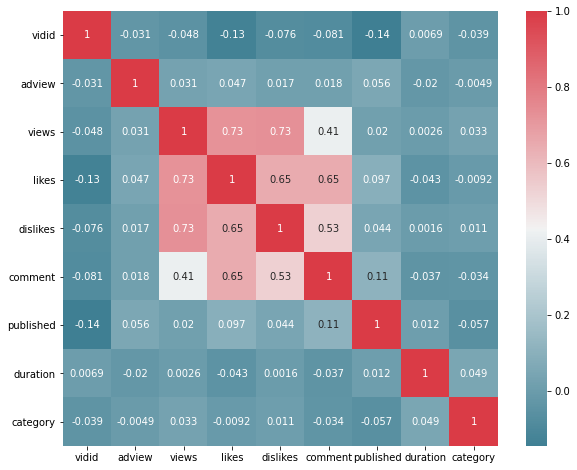

In [81]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()
# red signifies high correlation and blue shows less correlation

### Splitting the dataset

In [82]:
#split data
#Y_train is the target variable in which we are storing the adviews
Y_train = pd.DataFrame(data = df.iloc[:,1].values, columns = ['target'])
Y_train.head()

target
0      40
1       2
2       1
3       6
4       1

In [83]:
#dropping vidid and adview columns from the dataframe as adview is already stored as target variable and vidid is not of much use for us
df = df.drop(['adview'],axis=1)
df = df.drop(['vidid'],axis=1)
df.head()

views  likes  dislikes  comment  published  duration  category
0  1031602   8523       363     1095       2168       457         6
1     1707     56         2        6       2185       570         4
2     2023     25         0        2       2094       136         3
3   620860    777       161      153       2119       262         8
4      666      1         0        0       2091        31         4

In [84]:
# splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11708, 7)
(2928, 7)
(11708, 1)
(2928, 1)


In [85]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

### Training the dataset with different models

In [86]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [87]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [88]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [89]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2727.146174863388
Mean Squared Error: 897767206.8142077
Root Mean Squared Error: 29962.763671167046


In [90]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3291.4337001834315
Mean Squared Error: 647129455.217597
Root Mean Squared Error: 25438.73926155927


In [91]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 924us/step - loss: 767406336.0000 - mean_squared_error: 767406336.0000
Epoch 2/100
366/366 [==============================] - 0s 954us/step - loss: 767398848.0000 - mean_squared_error: 767398848.0000
Epoch 3/100
366/366 [==============================] - 0s 952us/step - loss: 767385856.0000 - mean_squared_error: 767385856.0000
Epoch 4/100
366/366 [==============================] - 0s 964us/step - loss: 767362944.0000 - mean_squared_error: 767362944.0000
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 767328832.0000 - mean_squared_error: 767328832.0000
Epoch 6/100
366/366 [==============================] - 0s 922us/step - loss: 767283584.0000 - mean_squared_error: 767283584.0000
Epoch 7/100
366/366 [==============================] - 0s 912us/step - loss: 767225536.0000 - mean_squared_error: 767225536.0000
Epoch 8/100
366/366 [==============================] - 0s 976us/step - loss: 767157056.0000 - mean_

### Saving the dataset and performing prediction using the saved model (best model)

In [92]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [93]:
import joblib
classifer = joblib.load("decisiontree_youtubeadview.pkl")

In [94]:
prediction = classifer.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 2727.146174863388
Mean Squared Error: 897767206.8142077
Root Mean Squared Error: 29962.763671167046


#Youtube_Adview Prediction Project

>Using test.csv

### Importing libraries and loading the dataset

In [95]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm

In [96]:
#loading the data
df = pd.read_csv('test.csv');
df.head()

vidid    views likes dislikes comment   published  duration category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S        B
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S        F
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S        D
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S        G
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S        B

### Preprocessing the data

In [97]:
#mapping category feature to numbers
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}

#transforming category
df['category'] = df['category'].map(category)
df.head()

vidid    views likes dislikes comment   published  duration  category
0   VID_1054   440238  6153      218    1377  2017-02-18   PT7M29S         2
1  VID_18629  1040132  8171      340    1047  2016-06-28   PT6M29S         6
2  VID_13967    28534    31       11       1  2014-03-10  PT37M54S         4
3  VID_19442  1316715  2284      250     274  2010-06-05   PT9M55S         7
4    VID_770  1893173  2519      225     116  2016-09-03    PT3M8S         2

In [98]:
df.shape

(8764, 8)

In [99]:
# removing F from likes, dislikes, views, comments and adviews
df = df[df.views != 'F']
df = df[df.comment != 'F']
df = df[df.dislikes != 'F']
df = df[df.likes != 'F']

In [100]:
#rows with F in views, likes, dislikes and comment is removed
df.shape

(8549, 8)

In [101]:
df.dtypes
# as we can see likes, views etc has object dtypes. So, need to covert to numeric

vidid        object
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [102]:
df['views'] = pd.to_numeric(df['views'])
df['comment'] = pd.to_numeric(df['comment'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])

In [103]:
# storing vidid column in another variable for further use
col_vidid = df['vidid']

In [104]:
# performing encoding on vivid, duration and published
from sklearn.preprocessing import LabelEncoder
df['published'] = LabelEncoder().fit_transform(df['published'])
df['vidid'] = LabelEncoder().fit_transform(df['vidid'])
df['duration'] = LabelEncoder().fit_transform(df['duration'])
df.head()

vidid    views  likes  dislikes  comment  published  duration  category
0    231   440238   6153       218     1377       2053      2115         2
1   3444  1040132   8171       340     1047       1825      2055         6
2   1593    28534     31        11        1       1009      1506         4
3   3775  1316715   2284       250      274        116      2265         7
4   7644  1893173   2519       225      116       1892      1625         2

In [105]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("test.csv")
mp = pd.read_csv("test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

df["duration"]=time1
df.head()

vidid    views  likes  dislikes  comment  published  duration  category
0    231   440238   6153       218     1377       2053       449         2
1   3444  1040132   8171       340     1047       1825       389         6
2   1593    28534     31        11        1       1009      2274         4
3   3775  1316715   2284       250      274        116       595         7
4   7644  1893173   2519       225      116       1892       188         2

In [106]:
df = df.drop(['vidid'],axis=1)
df.head()

views  likes  dislikes  comment  published  duration  category
0   440238   6153       218     1377       2053       449         2
1  1040132   8171       340     1047       1825       389         6
2    28534     31        11        1       1009      2274         4
3  1316715   2284       250      274        116       595         7
4  1893173   2519       225      116       1892       188         2

### Predicting the Adviews by the Trained model

In [107]:
import joblib
classifer = joblib.load("decisiontree_youtubeadview.pkl")
prediction = classifer.predict(df)


In [108]:
prediction

array([58., 58., 58., ..., 58., 58., 58.])

### Saving the prediction to "*Predictions_Submission.csv*" file

In [109]:
#saving prediction as csv file
np.savetxt('Predictions_Submission.csv',prediction,delimiter=',')